In [1]:
import sys

sys.path.append("../src/")

In [2]:
import pathlib
from collections import defaultdict
from typing import Tuple

import hydra
import numpy as np
from omegaconf import DictConfig, OmegaConf
from sklearn.linear_model import Ridge
from sklearn.metrics import f1_score

from metric import f1_score_with_threshold
from utils import timer
from utils.io import load_pickle, save_pickle, save_txt

In [3]:
input_dir = pathlib.Path("../data/train/")

In [4]:
oof_xgb_all = []
oof_lgbm_all = []
label_all_level = []
for level in range(1, 19):
    label = load_pickle(
        str(input_dir / f"label-xgb-level_{level}.pkl")
    ).ravel()
    oof_xgb = load_pickle(str(input_dir / f"oof-xgb-level_{level}.pkl"))
    oof_lgbm = load_pickle(str(input_dir / f"oof-lgbm-level_{level}.pkl"))

    oof_xgb_all.append(oof_xgb)
    oof_lgbm_all.append(oof_lgbm)
    label_all_level.append(label)


label = np.concatenate(label_all_level)
oof_xgb = np.concatenate(oof_xgb_all)
oof_lgbm = np.concatenate(oof_lgbm_all)

In [5]:
scores = []
thresholds = []
best_score = 0.0
best_threshold = 0.0

for threshold in np.arange(0.40, 0.81 ,0.01):
    print(f'{threshold:.02f}, ',end='')
    preds = (oof_lgbm.reshape((-1))>threshold).astype('int')
    m = f1_score(label.reshape((-1)), preds, average='macro')   
    scores.append(m)
    thresholds.append(threshold)
    if m>best_score:
        best_score = m
        best_threshold = threshold

0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.70, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.80, 

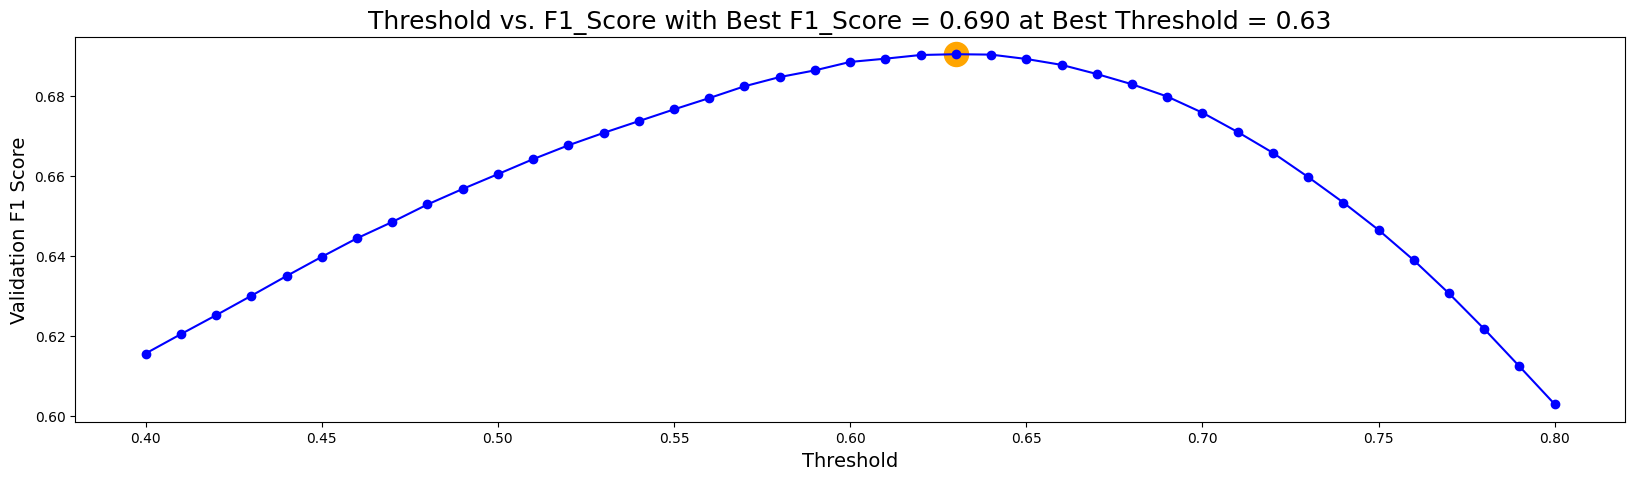

In [6]:
import matplotlib.pyplot as plt

# PLOT THRESHOLD VS. F1_SCORE
plt.figure(figsize=(20,5))
plt.plot(thresholds,scores,'-o',color='blue')
plt.scatter([best_threshold], best_score, color='orange', s=300, alpha=1)
plt.xlabel('Threshold',size=14)
plt.ylabel('Validation F1 Score',size=14)
plt.title(f'Threshold vs. F1_Score with Best F1_Score = {best_score:.3f} at Best Threshold = {best_threshold:.3}',size=18)
plt.show()